a) Read and display the image *heavy.jpg*. (Note that there are different solutions.)

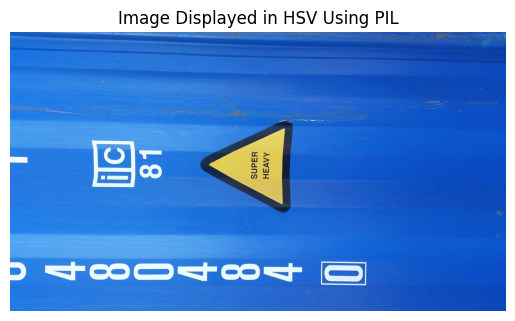

In [5]:
from PIL import Image
import matplotlib.pyplot as plt

# Load and convert the image to RGB using PIL
image_pil = Image.open('heavy.jpg').convert('HSV')

# Display the image
plt.imshow(image_pil)
plt.title('Image Displayed in HSV Using PIL')
plt.axis('off')
plt.show()


c) + d) Convert the RGB image to grayscale.

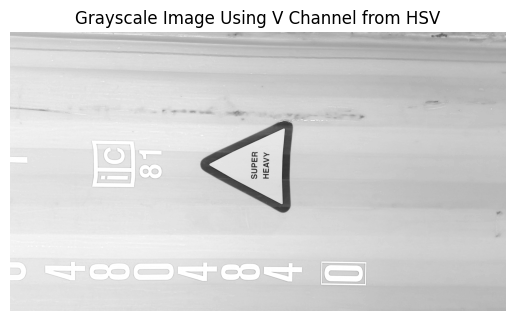

In [6]:
import numpy as np

image_pil = Image.open('heavy.jpg').convert('HSV')

# Convert to NumPy array to extract the V (value) channel
image_hsv = np.array(image_pil)

# Extract the V channel (intensity), which is at index 2
v_channel = image_hsv[:, :, 2]

# Convert V channel back to an image in grayscale
image_gray_pil = Image.fromarray(v_channel, mode='L')

# Display the grayscale image
plt.imshow(image_gray_pil, cmap='gray')
plt.title('Grayscale Image Using V Channel from HSV')
plt.axis('off')
plt.show()

e) Compute and display a histogram of the grayscale image. Try at least 2 (or more) different number of bins or bin width. Describe what you see.

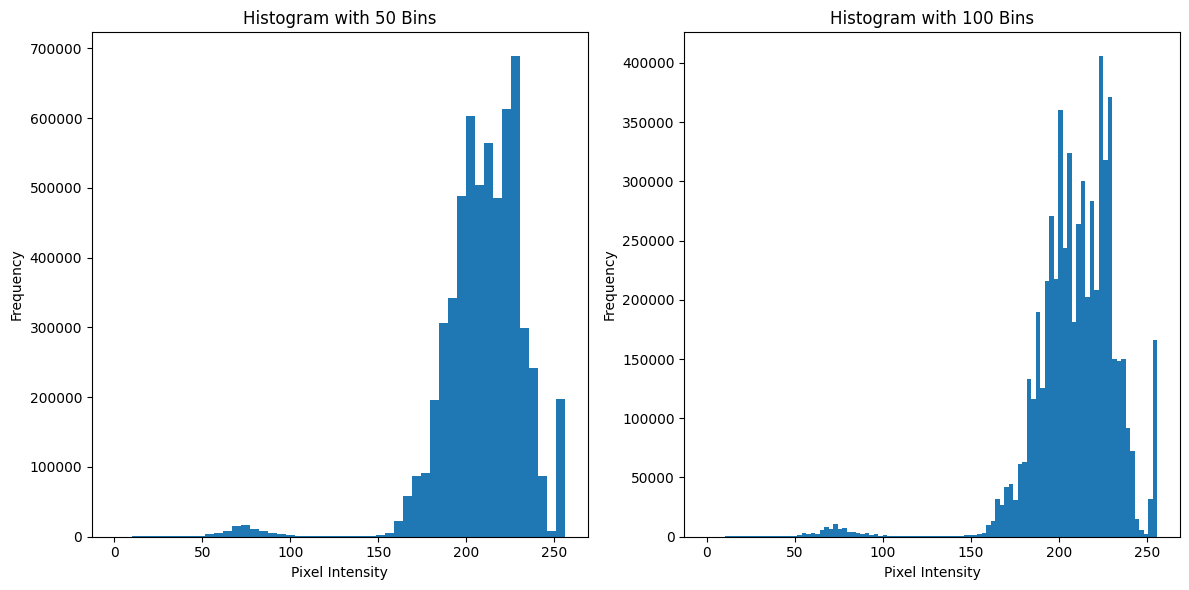

In [7]:
# Convert the grayscale PIL image to a NumPy array
image_gray_np = np.array(image_gray_pil)

plt.figure(figsize=(12, 6))

# Histogram with 50 bins
plt.subplot(1, 2, 1)
plt.hist(image_gray_np.ravel(), bins=50, range=[0, 256])
plt.title('Histogram with 50 Bins')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Histogram with 100 bins
plt.subplot(1, 2, 2)
plt.hist(image_gray_np.ravel(), bins=100, range=[0, 256])
plt.title('Histogram with 100 Bins')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

f. We now aim to segment the white letters and digits. For this purpose: Define the lower and upper bounds for the values that you want to segment.

g. Retrieve a binary mask. It must have the same width and height as the original image, and should have the value 255 (white) for pixels within the range and 0 (black) for pixels outside the range.

h. display the result

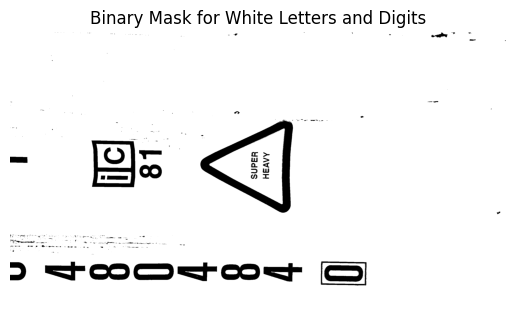

In [8]:
# f. Define the lower and upper bounds for white (in grayscale)
lower_bound = 150
upper_bound = 245

# g. Retrieve a binary mask using the same width and height as the original image
binary_mask_pil = np.where((image_gray_np >= lower_bound) & (image_gray_np <= upper_bound), 255, 0)

# Convert the NumPy array back to a PIL image for display
binary_mask_image_pil = Image.fromarray(binary_mask_pil.astype(np.uint8))

# h. Display the binary mask
plt.imshow(binary_mask_image_pil, cmap='gray')
plt.title('Binary Mask for White Letters and Digits')
plt.axis('off')
plt.show()

i. Describe what you need to be adapt if you wish to segment colours from the RGB image.

#### Work with the RGB channels:
Hue: Yellow typically falls within a Hue range of around 20 to 40 degrees (out of 360), but since PIL stores Hue in the range of 0-255, the approximate range for yellow is [20, 40].

Saturation and Value: We’ll adjust the saturation and value ranges to focus on vibrant and bright yellows.


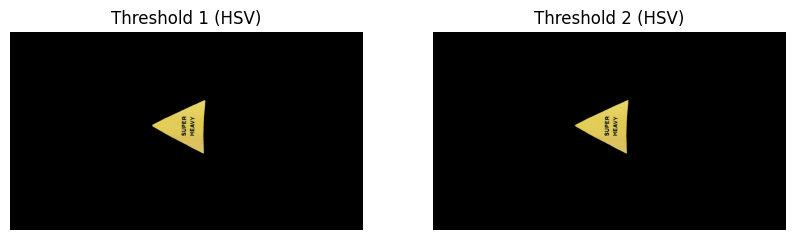

In [9]:
import numpy as np

# Convert the HSV image to a NumPy array
image_hsv_np = np.array(image_pil)

# Define the lower and upper bounds for yellow in HSV
# Hue: [20, 40], Saturation: [100, 255], Value: [100, 255]
thresholds = [
    {'lower': [20, 100, 100], 'upper': [40, 255, 255]},  # Typical bright yellow
    {'lower': [15, 100, 100], 'upper': [45, 255, 255]}   # Slightly broader range for yellow
]

# Create a plot to display all results
plt.figure(figsize=(10, 5))

# Loop over the thresholds, apply them, and display the results
for i, threshold in enumerate(thresholds):
    lower_bound = np.array(threshold['lower'], dtype=np.uint8)
    upper_bound = np.array(threshold['upper'], dtype=np.uint8)

    # Create a binary mask based on the thresholds in HSV space
    mask = np.all((image_hsv_np >= lower_bound) & (image_hsv_np <= upper_bound), axis=-1)
    
    # Apply the mask to the original RGB image to keep only yellow areas
    segmented_image = np.where(mask[..., None], image_hsv_np, 0)
    
    # Convert back to a PIL image for display
    segmented_image_pil = Image.fromarray(segmented_image.astype(np.uint8), mode='HSV').convert('RGB')
    
    # Display the result
    plt.subplot(1, 2, i + 1)
    plt.imshow(segmented_image_pil)
    plt.title(f'Threshold {i + 1} (HSV)')
    plt.axis('off')

plt.show()